# Installations

In [74]:
# import nltk

# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('sentiwordnet')
# nltk.download('wordnet')

In [75]:
# !pip install afinn

In [76]:
# !pip install nrclex

# Imports

In [77]:
import pandas as pd
from afinn import Afinn
from nltk.corpus import sentiwordnet as swn
from nrclex import NRCLex
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [78]:
df = pd.read_csv('third_deliverable_superset_2.0.csv')
df.head()

,flavour,user_name,rating,title,review_description,date,country
0,Salted Caramel,Peter_the_Gr8,4.0,"Good coffee, bad packaging",I enjoy this coffee. It's an excellent taste w...,"June 14, 2023",United States 🇺🇸
1,Chocolate Raspberry Truffle,Sherry Mitchell,5.0,Third try is a charm,It took me 3x (3 different kcup brands) to fin...,"June 10, 2023",United States 🇺🇸
2,Chocolate Raspberry Truffle,VinRob,5.0,Perfect Flavor!!!!,WAs looking forward to trying this flavor and ...,"May 23, 2023",United States 🇺🇸
3,Vanilla Pumpkin Spice,Fae,4.0,"Not bad, could be better","I've come to really love this brand, but of co...","March 12, 2023",United States 🇺🇸
4,Chocolate Raspberry Truffle,Lashlouise,5.0,Awesome Flavor,Love the flavor. Will definitely buy again!!,"June 16, 2023",United States 🇺🇸


In [79]:
df.dropna(subset=['review_description'], inplace=True)

In [80]:
# input_file = 'nrc_lexicon.txt'
# output_file = 'nrc_lexicon.csv'

# nrc_lex = pd.read_csv(input_file, sep='\t')

# nrc_lex.to_csv(output_file, index=False)

# Lexicon Files: Bing, NRC

In [81]:
bing_lexicon = pd.read_csv('bing_lexicon.csv')
bing_lexicon.head()

,Word,Sentiment
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [82]:
nrc_lexicon = pd.read_csv('nrc_lexicon.csv')
nrc_lexicon.head()

,Word,Emotion,Value
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0


In [83]:
nrc_lexicon['Emotion'].value_counts()

Emotion
anger           14154
anticipation    14154
disgust         14154
fear            14154
joy             14154
negative        14154
positive        14154
sadness         14154
surprise        14154
trust           14154
Name: count, dtype: int64

# Sentiment Analysis: Afinn, Bing, NRC Lexicon based

In [84]:
data = df.copy()

data['cleaned_reviews'] = data['review_description'].apply(lambda x: ' '.join(x.lower().split()))

afinn = Afinn()

bing_lexicon = pd.read_csv('bing_lexicon.csv')
bing_lexicon = dict(zip(bing_lexicon['Word'], bing_lexicon['Sentiment']))

nrc_lexicon = pd.read_csv('nrc_lexicon.csv')
nrc_lexicon = nrc_lexicon.groupby('Word')['Value'].sum().to_dict()

def calculate_afinn_score(text):
    return afinn.score(text)

def calculate_bing_score(text):
    words = text.split()
    score = sum(bing_lexicon.get(word, 0) for word in words)
    return score

def calculate_nrc_score(text):
    words = text.split()
    score = sum(nrc_lexicon.get(word, 0) for word in words)
    return score

def assign_sentiment_label(score):
    if score > 3:
        return 'Very Positive'
    elif score > 0:
        return 'Slightly Positive'
    elif score < -3:
        return 'Very Negative'
    elif score < 0:
        return 'Slightly Negative'
    else:
        return 'Neutral'

def calculate_emotion_counts(text):
    emotion_counts = {'anger': 0, 'anticipation': 0, 'disgust': 0, 'fear': 0, 'joy': 0, 'negative': 0, 'positive': 0, 'sadness': 0, 'surprise': 0, 'trust': 0}
    nrc_obj = NRCLex(text)
    emotions = nrc_obj.affect_frequencies
    for emotion, count in emotions.items():
        emotion_counts[emotion] = count
    return emotion_counts

data['afinn_score'] = data['cleaned_reviews'].apply(calculate_afinn_score)
data['bing_score'] = data['cleaned_reviews'].apply(calculate_bing_score)
data['nrc_score'] = data['cleaned_reviews'].apply(calculate_nrc_score)

data['sentiment_label'] = (data['afinn_score'] + data['bing_score'] + data['nrc_score']).apply(assign_sentiment_label)

emotion_counts = data['cleaned_reviews'].apply(calculate_emotion_counts)
emotion_df = pd.DataFrame(emotion_counts.tolist())

data = pd.concat([data, emotion_df], axis=1)

data

,flavour,user_name,rating,title,review_description,date,country,cleaned_reviews,afinn_score,bing_score,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,anticip
0,Salted Caramel,Peter_the_Gr8,4.0,"Good coffee, bad packaging",I enjoy this coffee. It's an excellent taste w...,"June 14, 2023",United States 🇺🇸,i enjoy this coffee. it's an excellent taste w...,6.0,6.0,...,0.266667,0.000000,0.066667,0.133333,0.133333,0.200000,0.000000,0.000000,0.133333,0.0
1,Chocolate Raspberry Truffle,Sherry Mitchell,5.0,Third try is a charm,It took me 3x (3 different kcup brands) to fin...,"June 10, 2023",United States 🇺🇸,it took me 3x (3 different kcup brands) to fin...,4.0,4.0,...,0.000000,0.000000,0.000000,0.250000,0.250000,0.500000,0.000000,0.000000,0.000000,0.0
2,Chocolate Raspberry Truffle,VinRob,5.0,Perfect Flavor!!!!,WAs looking forward to trying this flavor and ...,"May 23, 2023",United States 🇺🇸,was looking forward to trying this flavor and ...,7.0,5.0,...,0.111111,0.074074,0.000000,0.111111,0.111111,0.222222,0.111111,0.000000,0.185185,0.0
3,Vanilla Pumpkin Spice,Fae,4.0,"Not bad, could be better","I've come to really love this brand, but of co...","March 12, 2023",United States 🇺🇸,"i've come to really love this brand, but of co...",1.0,3.0,...,0.071429,0.071429,0.071429,0.071429,0.214286,0.214286,0.142857,0.000000,0.071429,0.0
4,Chocolate Raspberry Truffle,Lashlouise,5.0,Awesome Flavor,Love the flavor. Will definitely buy again!!,"June 16, 2023",United States 🇺🇸,love the flavor. will definitely buy again!!,3.0,3.0,...,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4223,Crazy Cups Flavored Variety Pack Decaf,S. Sisk,5.0,Great customer service,Awesome customer service. I received a sampler...,"March 11, 2021",the United States 🇺🇸,awesome customer service. i received a sampler...,11.0,11.0,...,0.107143,0.000000,0.035714,0.214286,0.071429,0.250000,0.035714,0.035714,0.107143,0.0
4224,Chocolate Lovers Variety Pack,yukicharley,5.0,Great flavors,I love sampler packs. I love that I can try al...,"January 1, 2020",the United States 🇺🇸,i love sampler packs. i love that i can try al...,21.0,17.0,...,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.0
4225,Crazy Cups Flavored Variety Pack Decaf,MaggieMcfly,5.0,Great Variety,I’m very pleased with my purchase.,"September 2, 2022",the United States 🇺🇸,i’m very pleased with my purchase.,3.0,3.0,...,0.181818,0.000000,0.000000,0.181818,0.000000,0.272727,0.000000,0.181818,0.181818,0.0
4226,Crazy Cups Flavored Variety Pack Decaf,Vimbai,5.0,Great Product!,i got these for my boyfriend for christmas and...,"April 6, 2022",the United States 🇺🇸,i got these for my boyfriend for christmas and...,12.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
emotion_sum = data[emotion_df.columns].sum(axis=0)
emotion_sum

anger           209.763359
anticipation    468.523351
disgust         161.641610
fear            140.474205
joy             530.553573
negative        445.652926
positive        917.896905
sadness         217.358898
surprise        210.513463
trust           494.621708
anticip           0.000000
dtype: float64

In [86]:
data_transposed = data.T

data_transposed['sum'] = emotion_sum

data_with_sum = data_transposed.T

data_with_sum

,flavour,user_name,rating,title,review_description,date,country,cleaned_reviews,afinn_score,bing_score,...,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,anticip
0,Salted Caramel,Peter_the_Gr8,4.0,"Good coffee, bad packaging",I enjoy this coffee. It's an excellent taste w...,"June 14, 2023",United States 🇺🇸,i enjoy this coffee. it's an excellent taste w...,6.0,6.0,...,0.266667,0.0,0.066667,0.133333,0.133333,0.2,0.0,0.0,0.133333,0.0
1,Chocolate Raspberry Truffle,Sherry Mitchell,5.0,Third try is a charm,It took me 3x (3 different kcup brands) to fin...,"June 10, 2023",United States 🇺🇸,it took me 3x (3 different kcup brands) to fin...,4.0,4.0,...,0.0,0.0,0.0,0.25,0.25,0.5,0.0,0.0,0.0,0.0
2,Chocolate Raspberry Truffle,VinRob,5.0,Perfect Flavor!!!!,WAs looking forward to trying this flavor and ...,"May 23, 2023",United States 🇺🇸,was looking forward to trying this flavor and ...,7.0,5.0,...,0.111111,0.074074,0.0,0.111111,0.111111,0.222222,0.111111,0.0,0.185185,0.0
3,Vanilla Pumpkin Spice,Fae,4.0,"Not bad, could be better","I've come to really love this brand, but of co...","March 12, 2023",United States 🇺🇸,"i've come to really love this brand, but of co...",1.0,3.0,...,0.071429,0.071429,0.071429,0.071429,0.214286,0.214286,0.142857,0.0,0.071429,0.0
4,Chocolate Raspberry Truffle,Lashlouise,5.0,Awesome Flavor,Love the flavor. Will definitely buy again!!,"June 16, 2023",United States 🇺🇸,love the flavor. will definitely buy again!!,3.0,3.0,...,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4224,Chocolate Lovers Variety Pack,yukicharley,5.0,Great flavors,I love sampler packs. I love that I can try al...,"January 1, 2020",the United States 🇺🇸,i love sampler packs. i love that i can try al...,21.0,17.0,...,0.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0,0.0,0.0
4225,Crazy Cups Flavored Variety Pack Decaf,MaggieMcfly,5.0,Great Variety,I’m very pleased with my purchase.,"September 2, 2022",the United States 🇺🇸,i’m very pleased with my purchase.,3.0,3.0,...,0.181818,0.0,0.0,0.181818,0.0,0.272727,0.0,0.181818,0.181818,0.0
4226,Crazy Cups Flavored Variety Pack Decaf,Vimbai,5.0,Great Product!,i got these for my boyfriend for christmas and...,"April 6, 2022",the United States 🇺🇸,i got these for my boyfriend for christmas and...,12.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
data_with_sum = data_with_sum.drop('anticip',axis = 1)
data = data.drop('anticip',axis = 1)

In [88]:
data_with_sum.to_csv('lexicon_based_sentiment_emotions.csv',index=False)

# Result Analysis

### Neutral

In [89]:
data[data['sentiment_label'] == 'Neutral'][['title','review_description','sentiment_label']]

,title,review_description,sentiment_label
6,Not bad at all,This coffee is actually very tasty.,Neutral
8,Really good flavor!,I would definitely buy again.\nIt smells divin...,Neutral
13,😉 It's Good 👍,I drink it Errday!!🤪 😋,Neutral
27,Taste was not to bad .3 stars,The taste was not bad it has a chemical smell ...,Neutral
44,Where’s the mint?,"Unfortunately, the mint flavor is very week.",Neutral
...,...,...,...
4150,"While the coffee is decent, the flavors are no...","While the coffee is decent, the flavors are no...",Neutral
4159,Gave me the jitters,It's says decaf but I don't think so. I've nev...,Neutral
4169,Just order from CrazyCups site,The pack I ordered did NOT come with flavors p...,Neutral
4178,It made me sick,Do not buy,Neutral


### Slightly Positive

In [90]:
data[data['sentiment_label'] == 'Slightly Positive'][['title','review_description','sentiment_label']]

,title,review_description,sentiment_label
90,Great flavor,The flavor is great! I’ve bought them twice now,Slightly Positive
103,"Good flavor, box open upon arrival",Coffee flavor was great. I should have counted...,Slightly Positive
127,Flavor not very strong,The flavor was kind of weak.,Slightly Positive
163,I taste no raspberry,"The chocolate flavor is generic tasting, there...",Slightly Positive
185,I am rating the cups lower than last time. ...,I am rating the cups lower than last time. We ...,Slightly Positive
...,...,...,...
4199,Design problems?,These don't appear well designed for Keurig ma...,Slightly Positive
4200,Not for tea or hot chocolate lovers at all‼️,Play Video\n It’s mostly coffee 😒 so they lied...,Slightly Positive
4208,Made the perfect Father's Day gift!,Both my parents in their 70's raved about how ...,Slightly Positive
4218,Definite repeat purchase,I wish I had purchased additional boxes on Pri...,Slightly Positive


### Slightly Negative

In [91]:
data[data['sentiment_label'] == 'Slightly Negative'][['title','review_description','sentiment_label']]

,title,review_description,sentiment_label
28,They Might taste good ... I may never know,Got these in because other brand was discontin...,Slightly Negative
49,Can’t taste any spices,"Makes a harsh cup of drinkable coffee, but can...",Slightly Negative
126,Meh,"Very faint taste of chocolate, no peanut butter.",Slightly Negative
155,Better run out and buy some caramel flavored c...,I don't really know what people are talking ab...,Slightly Negative
172,peppermint mocha k cups,"Terrible flavor, nothing at all like a pepperm...",Slightly Negative
...,...,...,...
4174,Terrible taste; not using any more,Terrible taste,Slightly Negative
4175,The flavor was just strong coffee little to no...,I haven’t used it all because I dislike the fl...,Slightly Negative
4191,Horrible purchase,"Several empty , grounds all over & in cup!/",Slightly Negative
4192,couldnt use in kuerig,"could not use, needle/water pressure too high",Slightly Negative


### Very Positive

In [92]:
data[data['sentiment_label'] == 'Very Positive'][['title','review_description','sentiment_label']]

,title,review_description,sentiment_label
0,"Good coffee, bad packaging",I enjoy this coffee. It's an excellent taste w...,Very Positive
1,Third try is a charm,It took me 3x (3 different kcup brands) to fin...,Very Positive
2,Perfect Flavor!!!!,WAs looking forward to trying this flavor and ...,Very Positive
3,"Not bad, could be better","I've come to really love this brand, but of co...",Very Positive
4,Awesome Flavor,Love the flavor. Will definitely buy again!!,Very Positive
...,...,...,...
4222,Very fun and awesome flavors!,"When I want a special cup of coffee, I pick ou...",Very Positive
4223,Great customer service,Awesome customer service. I received a sampler...,Very Positive
4224,Great flavors,I love sampler packs. I love that I can try al...,Very Positive
4225,Great Variety,I’m very pleased with my purchase.,Very Positive


### Very Negative

In [93]:
data[data['sentiment_label'] == 'Very Negative'][['title','review_description','sentiment_label']]

,title,review_description,sentiment_label
10,Open,I buy this for my Mom every month. It’s disapp...,Very Negative
120,Where's the Peppermint?,This is called Peppermint Mocha. There is no t...,Very Negative
130,Bitter and not very flavorful,"After several weeks of testing, our consensus ...",Very Negative
203,Bad k cups,Ordered 2 boxes and both boxes the cups leak c...,Very Negative
241,No flavor,Product was horrible. Had nearly no taste ...,Very Negative
...,...,...,...
3959,WILL NOT WORK IN MY KUERIG MACHINE!!! DO NOT B...,I had bought this brand in the past and wanted...,Very Negative
3969,ERRORS &amp; BURSTS,I have NEVER had trouble from these until now....,Very Negative
4176,Crazy cups,I gave it 1 star because of the flavor choices...,Very Negative
4188,Terrible!,Terrible coffee! Many of the flavors in my shi...,Very Negative


## Overall Distribution of Sentiment

In [94]:
data['sentiment_label'].value_counts()

sentiment_label
Very Positive        3354
Slightly Positive     354
Neutral               244
Slightly Negative     176
Very Negative          98
Name: count, dtype: int64

# Visualizations

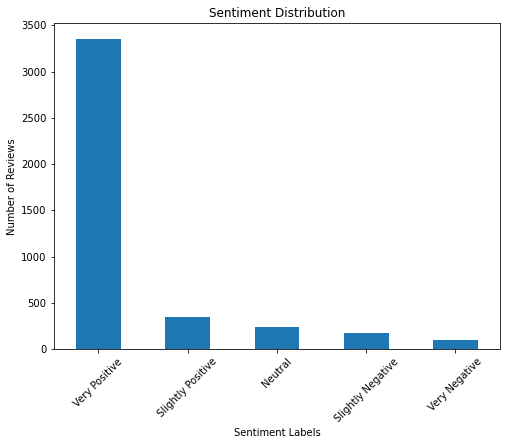

In [95]:
sentiment_counts = data['sentiment_label'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Labels')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

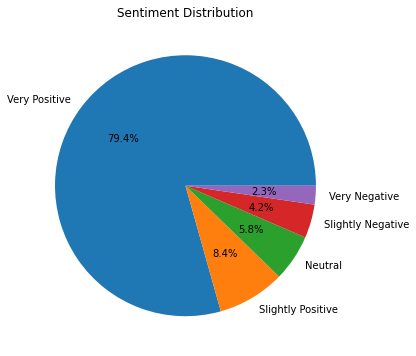

In [96]:
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

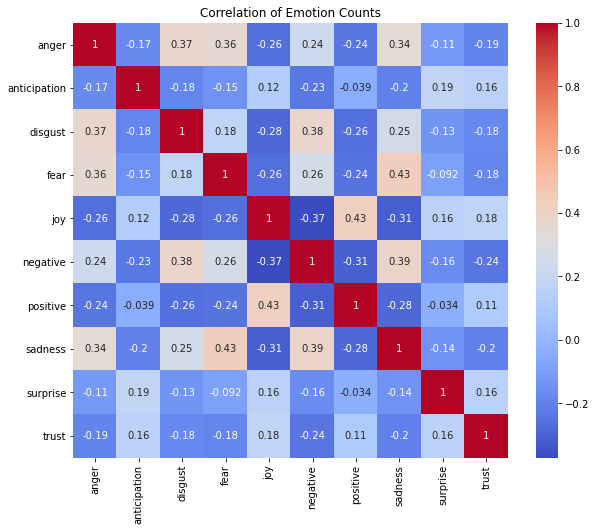

In [97]:
emotion_corr = data[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(emotion_corr, cmap='coolwarm', annot=True, square=True)
plt.title('Correlation of Emotion Counts')
plt.show()

### Pie Chart comparison to evaluate the sentiment labels w.r.t the star ratings

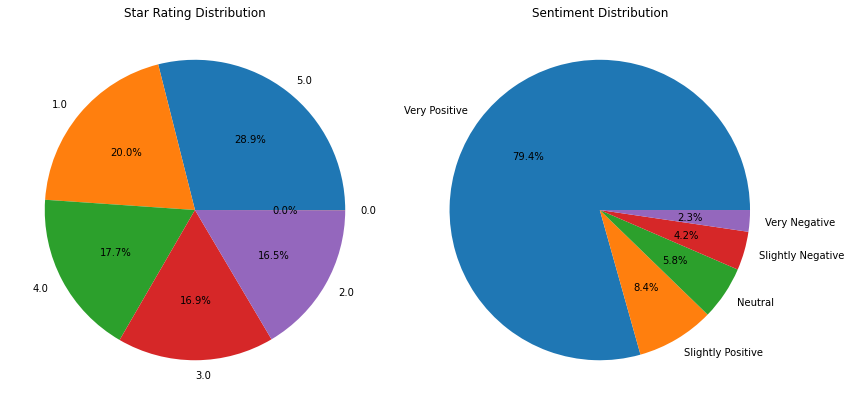

In [98]:
star_counts = data['rating'].value_counts()

sentiment_counts = data['sentiment_label'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(star_counts, labels=star_counts.index, autopct='%1.1f%%')
plt.title('Star Rating Distribution')

plt.subplot(1, 2, 2)
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')

plt.tight_layout()
plt.show()

### Relationship between the Drink Flavours and the sentiment label

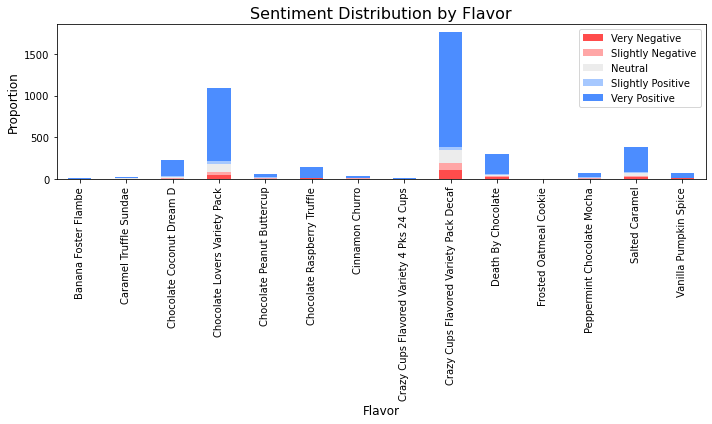

In [99]:
grouped_data = data.groupby(['flavour', 'sentiment_label']).size().unstack()

sentiment_labels = ['Very Negative', 'Slightly Negative', 'Neutral', 'Slightly Positive', 'Very Positive']
colors = ['#FF4C4C', '#FFA6A6', '#ECECEC', '#A6C8FF', '#4C8DFF']

fig, ax = plt.subplots(figsize=(10, 6))

grouped_data.plot(kind='bar', stacked=True, color=colors, ax=ax)

ax.set_title('Sentiment Distribution by Flavor', fontsize=16)
ax.set_xlabel('Flavor', fontsize=12)
ax.set_ylabel('Proportion', fontsize=12)
ax.legend(sentiment_labels, loc='upper right')

plt.tight_layout()
plt.show()